In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [125]:
train = pd.read_csv("data/km_train_extra.csv", encoding='utf-8', sep=',')

test = pd.read_csv("data/km_test_extra.csv", encoding='utf-8', sep=',')

In [101]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,kn_8,kn_16,kn_32,kn_64,kn_128,kn_256,kn_512
0,1,60,3,0.212898,-0.205996,1,1,3,3,0,...,8,4,5.319106,2,6,5,41,34,251,1
1,2,20,3,0.645875,-0.090876,1,1,3,3,0,...,8,4,5.258877,3,10,28,30,102,202,400
2,3,60,3,0.299493,0.074297,1,1,0,3,0,...,8,4,5.349278,2,6,5,41,34,2,159
3,4,70,3,0.068572,-0.095881,1,1,0,3,0,...,8,0,5.146128,2,2,24,32,20,189,355
4,5,60,3,0.761335,0.375612,1,1,0,3,0,...,8,4,5.397940,2,14,1,49,85,110,29


In [102]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,kn_8,kn_16,kn_32,kn_64,kn_128,kn_256,kn_512
0,1461,20,2,0.684849,0.363929,1,1,3,3,0,...,1.713905,8,4,6,12,2,57,89,118,103
1,1462,20,3,0.715852,0.897861,1,1,0,3,0,...,1.713905,8,4,6,12,2,37,72,119,64
2,1463,60,3,0.498831,0.809646,1,1,0,3,0,...,1.713905,8,4,2,6,5,41,90,141,277
3,1464,60,3,0.622843,0.032064,1,1,0,3,0,...,1.713905,8,4,2,6,5,41,90,2,277
4,1465,120,3,-0.462261,-0.971808,1,1,0,1,0,...,1.713905,8,4,4,0,3,62,29,28,42


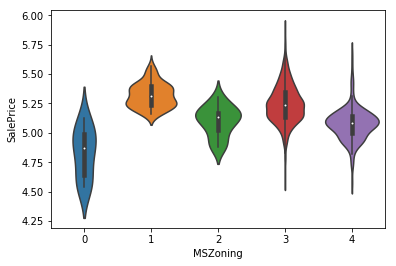

In [40]:
sns.violinplot(x = train['MSZoning'], y = train['SalePrice'])

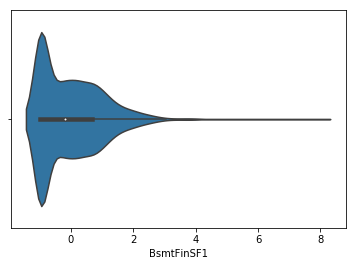

In [41]:
sns.violinplot(x = test['BsmtFinSF1'])

LotFrontage · LotArea

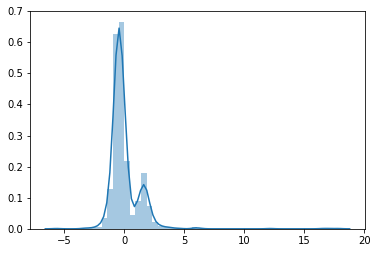

In [33]:
sns.distplot(train ['LotArea'] - train['LotFrontage'])

In [126]:
train['LtArea-Frontage'] = pd.Series(train ['LotArea'] - train['LotFrontage'])
test['LtArea-Frontage'] = pd.Series(test ['LotArea'] - test['LotFrontage'])

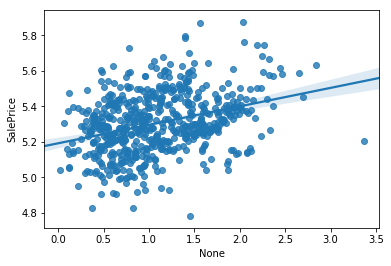

In [62]:
sns.regplot(\
            (train['BsmtUnfSF']+ \
            train['TotalBsmtSF'])**0.5, train ['SalePrice'])

In [120]:
# train['Bsmt'] = pd.Series((train['BsmtUnfSF']+ \
#             train['TotalBsmtSF'])**0.5)
# test['Bsmt'] = pd.Series((test['BsmtUnfSF']+ \
#             test['TotalBsmtSF'])**0.5)

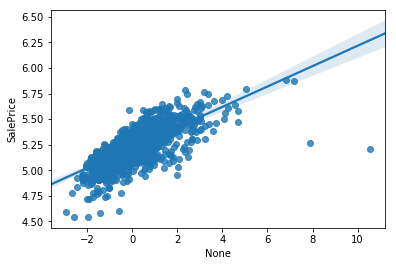

In [67]:
sns.regplot(\
            (train['1stFlrSF']+ \
            train['2ndFlrSF']), train ['SalePrice'])

In [127]:
train['floor'] = pd.Series(train['1stFlrSF']+ \
            train['2ndFlrSF'])
test['floor'] = pd.Series(test['1stFlrSF']+ \
            test['2ndFlrSF'])

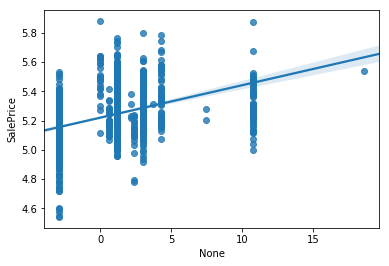

In [73]:
sns.regplot(\
            train['Fireplaces']* \
            train['FireplaceQu'], train ['SalePrice'])

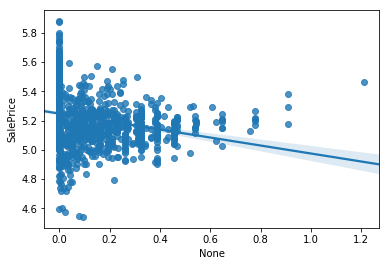

In [92]:
sns.regplot(\
            train['PoolQC']* \
            train['HeatingQC']* \
            train['OverallQual']* \
            train['OverallCond']* \
            train['ExterQual']* \
            train['ExterCond']* \
            train['BsmtQual']* \
            train['KitchenQual']* \
            train['FireplaceQu']* \
            train['GarageQual']* \
            train['GarageCond'] * 1e-7
            , train ['SalePrice'])

In [128]:
train['Quality'] = pd.Series(train['PoolQC']* \
            train['HeatingQC']* \
            train['OverallQual']* \
            train['OverallCond']* \
            train['ExterQual']* \
            train['ExterCond']* \
            train['BsmtQual']* \
            train['KitchenQual']* \
            train['FireplaceQu']* \
            train['GarageQual']* \
            train['GarageCond'] * 1e-7)
test['Quality'] = pd.Series(test['PoolQC']* \
            test['HeatingQC']* \
            test['OverallQual']* \
            test['OverallCond']* \
            test['ExterQual']* \
            test['ExterCond']* \
            test['BsmtQual']* \
            test['KitchenQual']* \
            test['FireplaceQu']* \
            test['GarageQual']* \
            test['GarageCond'] * 1e-7)

In [129]:
train.shape, test.shape

((1451, 91), (1459, 90))

In [130]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,kn_8,kn_16,kn_32,kn_64,kn_128,kn_256,kn_512,LtArea-Frontage,floor,Quality
0,1,60,3,0.212898,-0.205996,1,1,3,3,0,...,2,6,5,41,34,251,1,-0.418894,0.368719,0.0000
1,2,20,3,0.645875,-0.090876,1,1,3,3,0,...,3,10,28,30,102,202,400,-0.736751,-0.533735,0.0000
2,3,60,3,0.299493,0.074297,1,1,0,3,0,...,2,6,5,41,34,2,159,-0.225196,0.562513,0.0000
3,4,70,3,0.068572,-0.095881,1,1,0,3,0,...,2,2,24,32,20,189,355,-0.164453,0.416924,0.1008
4,5,60,3,0.761335,0.375612,1,1,0,3,0,...,2,14,1,49,85,110,29,-0.385724,1.575728,0.0000


In [133]:
test.isnull().values.any(), train.isnull().values.any()

(False, False)

In [134]:
train.to_csv('data/train_ft_eng.csv', sep=',', index=False)
test.to_csv('data/test_ft_eng.csv', sep=',', index=False)